In [3]:
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt

In [4]:
url1 ="https://raw.githubusercontent.com/VasiaPiven/covid19_ua/master/covid19_by_settlement_dynamics.csv"
url2 ="https://raw.githubusercontent.com/VasiaPiven/covid19_ua/master/covid19_by_settlement_actual.csv"
dynamics = requests.get(url1).content
active = requests.get(url2).content
data_frame = pd.read_csv(io.StringIO(dynamics.decode('utf-8')))
data_frame_map = pd.read_csv(io.StringIO(active.decode('utf-8')))
data_frame.set_index('zvit_date', inplace=True)
data_frame
data_frame_map

,zvit_date,registration_area,registration_region,registration_settlement,registration_settlement_lng,registration_settlement_lat,total_susp,total_confirm,total_death,total_recover
0,2020-10-29,Вінницька,Барський район,Антонівка,27.785871,49.086871,2,1,0,0
1,2020-10-29,Вінницька,Барський район,Балки,27.683143,49.060322,3,3,0,3
2,2020-10-29,Вінницька,Барський район,Бар,27.682612,49.076848,82,70,1,32
3,2020-10-29,Вінницька,Барський район,Верхівка,27.654117,48.902205,1,0,0,0
4,2020-10-29,Вінницька,Барський район,Войнашівка,27.719144,49.049600,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
13373,2020-10-29,Чернігівська,Чернігівський район,Шестовиця,31.196438,51.387446,4,4,0,0
13374,2020-10-29,Чернігівська,Чернігівський район,Шибиринівка,30.977204,51.555076,2,2,0,1
13375,2020-10-29,Чернігівська,Чернігівський район,Шульгівка,30.835358,51.381577,2,2,0,1
13376,2020-10-29,Чернігівська,Чернігівський район,Юр'ївка,31.156173,51.604506,1,1,0,0


In [5]:
def parse_yes_no(value):
    if value=="":
        return int(1)
    return int(0)

In [6]:
# data_frame['is_required_hospitalization'] = data_frame['is_required_hospitalization'].apply(parse_yes_no)

In [7]:
newdf = data_frame[data_frame.registration_area == "Вінницька"]
newdf

,registration_area,registration_region,registration_settlement,new_susp,new_confirm,active_confirm,new_death,new_recover
zvit_date,,,,,,,,
2020-10-29,Вінницька,Барський район,Антонівка,0,0,1,0,0
2020-10-29,Вінницька,Барський район,Бар,1,1,37,0,0
2020-10-29,Вінницька,Барський район,Войнашівка,0,0,1,0,0
2020-10-29,Вінницька,Барський район,Володіївці,0,0,1,0,0
2020-10-29,Вінницька,Барський район,Гавришівка,0,0,1,0,0
...,...,...,...,...,...,...,...,...
2020-03-18,Вінницька,Вінницький район,Вороновиця,1,0,0,0,0
2020-03-17,Вінницька,Вінниця,Вінниця,3,0,0,0,0
2020-03-16,Вінницька,Вінницький район,Стрижавка,1,0,0,0,0


In [8]:
data_frame_group = newdf.groupby(newdf.index).sum()
data_frame_group

,new_susp,new_confirm,active_confirm,new_death,new_recover
zvit_date,,,,,
2020-03-12,1,0,0,0,0
2020-03-15,1,0,0,0,0
2020-03-16,1,0,0,0,0
2020-03-17,3,0,0,0,0
2020-03-18,2,0,0,0,0
...,...,...,...,...,...
2020-10-25,155,104,3566,2,17
2020-10-26,105,139,3569,2,134
2020-10-27,192,179,3621,3,124


In [9]:
def get_column_by_name(name, table):
    if name == "zvit_date":
        return table.index
    return table[name]

In [10]:
def show_line(first_name, second_name, table):
    col1 = get_column_by_name(first_name, table)
    col2 = get_column_by_name(second_name, table)
    plt.plot(col1, col2)
    plt.title(first_name + " - " + second_name)
    plt.ylabel(second_name)
    plt.xlabel(first_name)
    plt.xticks(rotation=90)

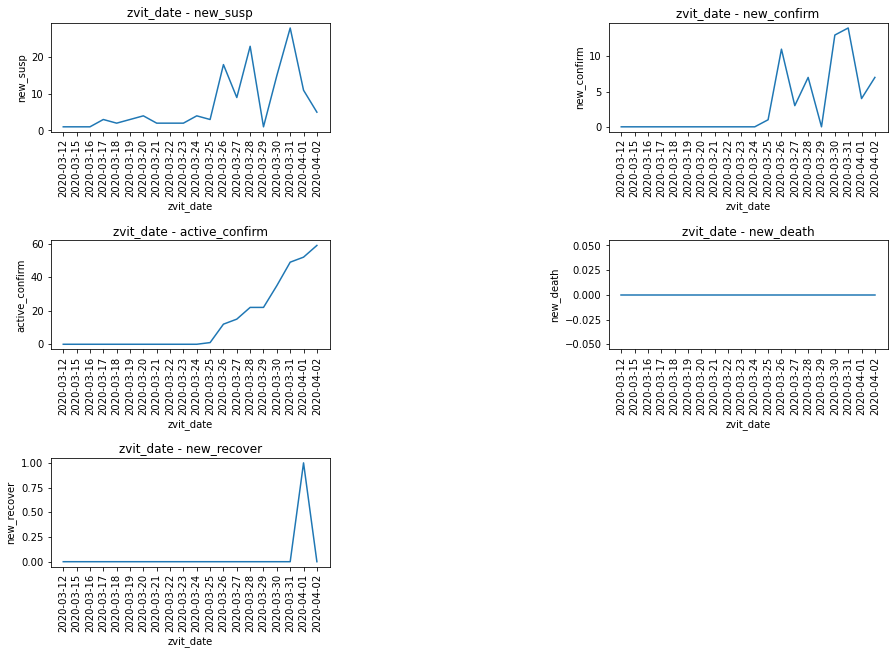

In [11]:
data_frame_group = data_frame_group.head(20)
plt.figure(figsize=(15,10))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1, hspace=1)
plt.subplot(3,2,1)
show_line("zvit_date", "new_susp", data_frame_group)
plt.subplot(3,2,2)
show_line("zvit_date", "new_confirm", data_frame_group)
plt.subplot(3,2,3)
show_line("zvit_date", "active_confirm", data_frame_group)
plt.subplot(3,2,4)
show_line("zvit_date", "new_death", data_frame_group)
plt.subplot(3,2,5)
show_line("zvit_date", "new_recover", data_frame_group)

In [12]:
unigue = set(data_frame["registration_area"])
data_frame_group_by_registration_area = data_frame.groupby(data_frame["registration_area"])[["new_susp", "new_death", "new_confirm", "new_recover"]].sum()
data_frame_group_by_registration_area

,new_susp,new_death,new_confirm,new_recover
registration_area,,,,
Івано-Франківська,24359,429,19981,9896
Волинська,15078,266,13326,7647
Вінницька,12005,178,10115,6205
Дніпропетровська,16239,349,14655,5730
Донецька,10038,97,9643,1519
Житомирська,15409,249,13866,7257
Закарпатська,15381,369,14158,6569
Запорізька,10347,118,9567,2236
Київська,19956,377,16119,7872


In [13]:
data_frame.to_excel('lab4.xlsx', 'Sheet1')
newdf.to_excel('lab4.xlsx', 'Sheet2')

KeyboardInterrupt: 

In [14]:
def men_woman(city):
    unique = set(data_frame["person_gender"])
    dictionary = dict.fromkeys(unique, 0)
    gender_df = data_frame
    if city:
        gender_df = data_frame[data_frame.registration_area == city]
    for i in gender_df["person_gender"]:
        dictionary[i] += 1
    print(city + " " + dictionary)

In [15]:
men_woman("")

KeyError: 'person_gender'

In [16]:
def medical_worker_by_city(city):
    medical_worker = data_frame
    if city:
        medical_worker = data_frame[data_frame.registration_area == city]
    count_medical_worker = medical_worker['is_medical_worker'].apply(parse_is_required_hospitalization).sum()
    print("Кількість медичних працівників, які мали covid-19 " + city + ": " + str(count_medical_worker))

In [17]:
medical_worker_by_city("Хмельницька")

KeyError: 'is_medical_worker'

In [18]:
def sick_by_city(city):
    sick = data_frame
    if city:
        sick = data_frame[data_frame.registration_area == city]
    confirm=sick["new_confirm"].sum()
    recover = sick["new_recover"].sum()
    death = sick["new_death"].sum()
    print("Кількість людей, які ше хворіють " + city + ": " + str(confirm - recover - death))

In [19]:
sick_by_city("Хмельницька")

Кількість людей, які ше хворіють Хмельницька: 8480


In [20]:
def confirm_by_city(city):
    confirm_df = data_frame
    if city:
        confirm_df = data_frame[data_frame.registration_area == city]
    confirm=confirm_df["new_confirm"].sum()
    print("Загальна кількість підтверджених на захворювання людей " + city + ": " + str(confirm))

In [21]:
confirm_by_city("")

Загальна кількість підтверджених на захворювання людей : 378728


In [22]:
def recover_by_city(city):
    recover_df = data_frame
    if city:
        recover_df = data_frame[data_frame.registration_area == city]
    recover = recover_df["new_recover"].sum()
    print("Загальна кількість людей, які виздоровіли " + city + ": " + str(recover))

In [23]:
recover_by_city("")

Загальна кількість людей, які виздоровіли : 155026


In [24]:
def death_by_city(city):
    death_df = data_frame
    if city:
        death_df = data_frame[data_frame.registration_area == city]
    death = death_df["new_death"].sum()
    print("Загальна кількість людей, які померли " + city + ": " + str(death))

In [25]:
death_by_city("")

Загальна кількість людей, які померли : 7041


In [26]:
# def percentage_medical_worker_by_city(city):
#     percentage_df = data_frame
#     if city:
#         percentage_df = data_frame[data_frame.registration_area == city]
#     count_medical_worker = percentage_df['is_medical_worker'].apply(parse_is_required_hospitalization).sum()
#     confirm=percentage_df["new_confirm"].sum()
#     print("Відсоток медичних працівників до загальної кількості хворих: " + str(count_medical_worker/confirm*100))

In [27]:
# percentage_medical_worker_by_city("")

In [28]:
def show_some_graphs_on_one_picture(names, dataframe):
    x = dataframe.index
    dd = []
    for col in names:
        dd.append(data_frame[data_frame.registration_area == col])
    plt.xlabel('Timeline')
    for col in dd:
        plt.plot(col.index, col.iloc[:,5])
  
    plt.xticks(rotation=90)
    plt.show()

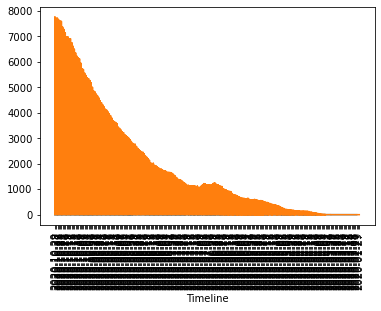

In [29]:
show_some_graphs_on_one_picture(["Хмельницька", "Львівська"], data_frame)

In [30]:
def show_map():
    map = plt.imread('ukraine.gif')
    fig, ax = plt.subplots()
    plt.figsize = (50, 50)
    ax.scatter(data_frame_map.registration_settlement_lng, data_frame_map.registration_settlement_lat, s=data_frame_map.total_confirm//50)
    ax.imshow(map, extent=[22,40,43,53])
    ax.set_xlim(22, 42.5)
    ax.set_ylim(43, 53)
    plt.show()

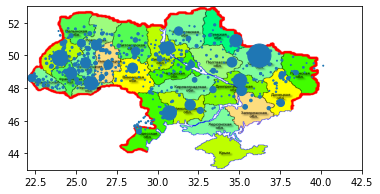

In [31]:
show_map()

In [ ]:

fig, ax = plt.subplots()

plt.rcParams["figure.figsize"] = (10,8)

arr_lena = mpimg.imread('ukraine.gif')

imagebox = OffsetImage(arr_lena, zoom=0.7)

ab = AnnotationBbox(imagebox, (0.5, 0.5))

ax.add_artist(ab)

plt.grid()

plt.draw()